# ObsID : 0945030131, SRCNUM : 7, Instru : EPN
Not on Simbad

## ESASky
There are a bunch of EPIC Stack pointers on the light green/blue source and one pointer on an extremely close blue source. https://sky.esa.int/esasky/?target=52.38566666666666%20-28.617833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Green source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032932.2-283705
- IAU name : 4XMM J032932.3-283705
- RA : 03h 29m 32.247s
- DEC : -28° 37' 05.84"

**Blue source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032933.0-283717
- IAU name : 4XMM J032933.1-283720
- RA : 03h 29m 33.006s
- DEC : -28° 37' 17.85""

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945030131_SRCNUM7_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.465e-03 +/- 1.365e-03 (53.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.131e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945030131_SRCNUM7_EPN_background_spectrum.fits
  Background Exposure Time: 1.131e+04 sec
 Using Response (RMF) File            ObsID0945030131_SRCNUM7_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945030131_SRCNUM7_EPN.arf



In [7]:
n_cts = 9.465e-03*1.131e+04
print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 107.04915


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 856.5, 661.5, -0.5)

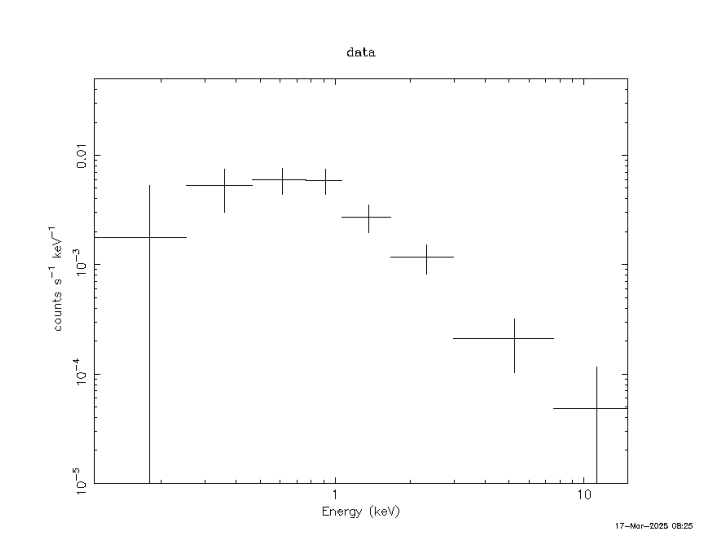

In [5]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.418188e+11     using 7 bins.

Tes

(-0.5, 861.5, 661.5, -0.5)

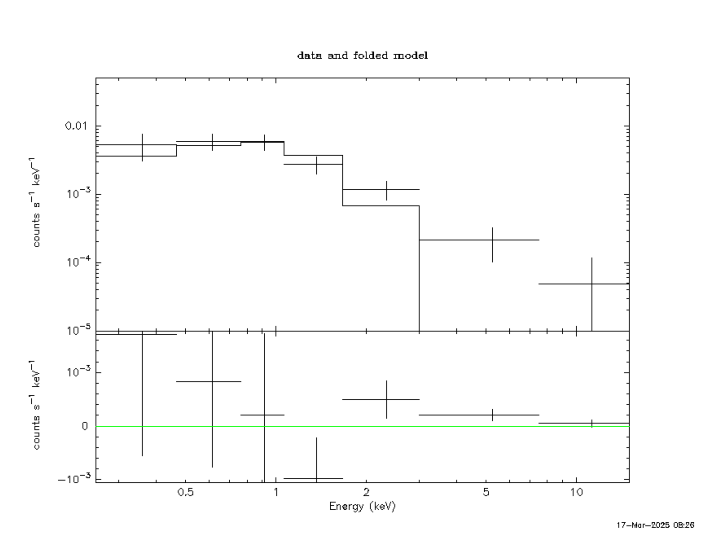

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.049819e+10     using 7 bins.

Test statistic : Chi-Squared              1.049819e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
27.4412      2.03024      -1      0.398314       6.17378   2.95734e-05
24.4135      103011       -2    0.00883442       21.2575   1.39920e-05
18.5271      344596       -3    0.00764117       1.03402   2.55893e-05
16.

(-0.5, 857.5, 662.5, -0.5)

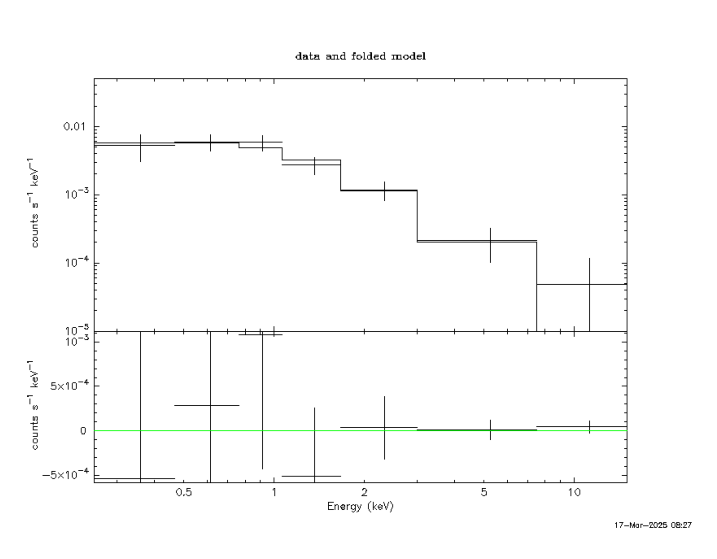

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.760964e+09     using 7 bins.

Test statistic : Chi-Squared              1.760964e+09     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
21.682       1.55069      -1       1.02316      0.804615   0.0

(-0.5, 856.5, 661.5, -0.5)

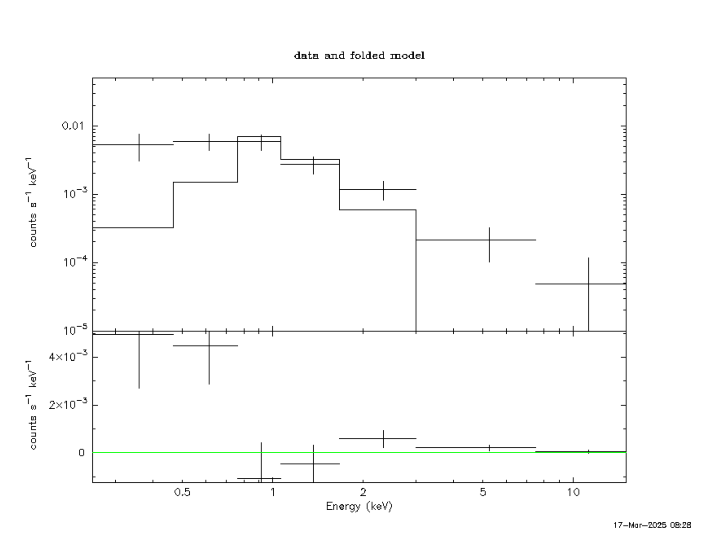

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.085023e+10     using 7 bins.

Test statistic : Chi-Squared              7.085023e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
35.6566      2.47182      -2     0.0202438      0.515292   4.76289e-06
10.3364      630722       -3   0.000344569       1.96595   1.49076e-05
2.60571      198178       -4     0.0306438       1.42665   2.43833e-05
1

(-0.5, 857.5, 656.5, -0.5)

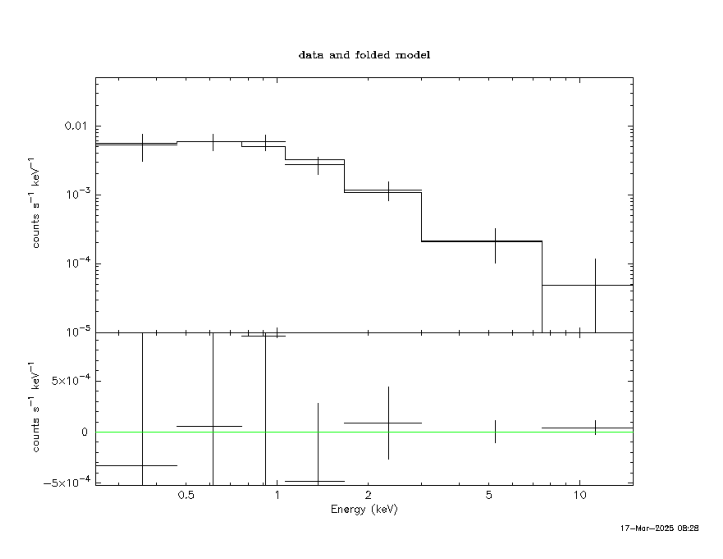

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model

In [14]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.332205e+11     using 7 bins.

Test statistic : Chi-Squared              1.332205e+11     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
38.8864      17907.9   

(-0.5, 854.5, 664.5, -0.5)

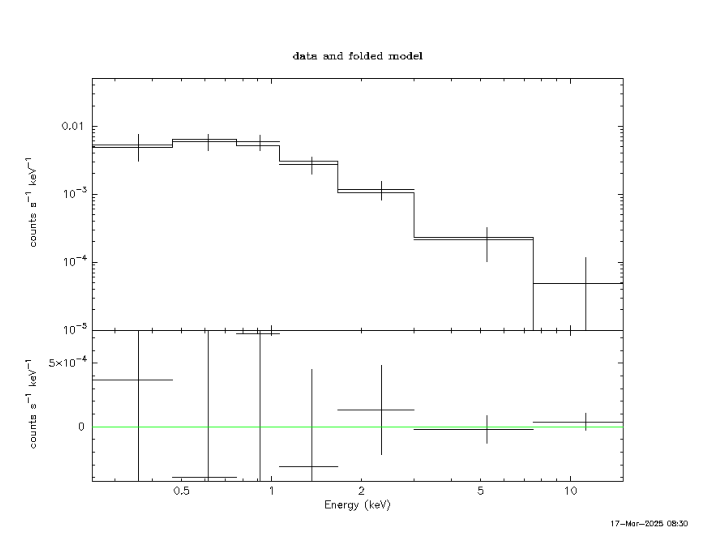

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 52.3844241°
- Dec = -28.6182713°

52.38 -28.62

**Column density :** nH = 4*10^20 cm^-2

In [16]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 530065.1035540504

bremss
(tbabs) : 1.2749377655531395e+20

apec
(tbabs) : 8.499705562678222e+21

powerlaw
(tbabs) : 5.102745647970579e+20

bremss+powerlaw
(tbabs) : 1.6694742811325434e+21


## Flux
### X-ray flux

In [17]:
AllModels.calcFlux(".2 12.0")

 Model Flux 5.7897e-05 photons (1.8649e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [18]:
Flux = 1.8649e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 1.8649e-13 ergs/cm^2/s


### Optical flux

In [19]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [20]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 3.3842797075520514
F_x-ray = 3.3842797075520514*F_optical


## Luminosity
No distance or parallax is available on ESASky.

In [21]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print()
print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [2.2313762896008006e+25, 2.2313762896008005e+31] erg/s

For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [2.231376289600801e+37, 2.2313762896008007e+45] erg/s


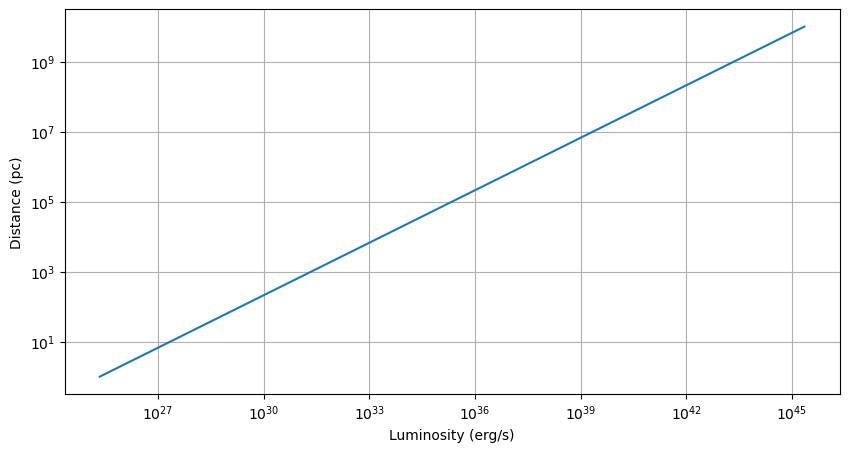

In [22]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()